### Defining pmt_from_pv then running test seeing different rates:

In [1]:
def pmt_from_pv(pv, r, n):
    if r == 0:
        return pv / n
    return pv * (r * (1 + r)**n) / ((1 + r)**n - 1)

In [2]:
pmt_from_pv(3000,.01/12,36)

84.62429803869061

In [3]:
pmt_from_pv(3000,.02/12,36)

85.9277361973673

In [4]:
pmt_from_pv(3000,.1/12,36)

96.80156158151273

In [5]:
pmt_from_pv(3000,.2/12,36)

111.49075007922166

### Adding rates as a value then using r in the calculation to calculate all the rates in our data set:

In [6]:
rates = [0.03, 0.06, 0.09, 0.12]   # example APRs
payments = [pmt_from_pv(10000, r/12, 36) for r in rates]

### Importing pandas to turn our rates and payments into a formatted table:

In [7]:
import pandas as pd

df = pd.DataFrame({
    'APR': [r*100 for r in rates],   # convert to %
    'Payment': payments
})

print(df)


    APR     Payment
0   3.0  290.812096
1   6.0  304.219375
2   9.0  317.997327
3  12.0  332.143098


### Importing matplotlib to create a chart and defining the title, labels, and if a grid is included:

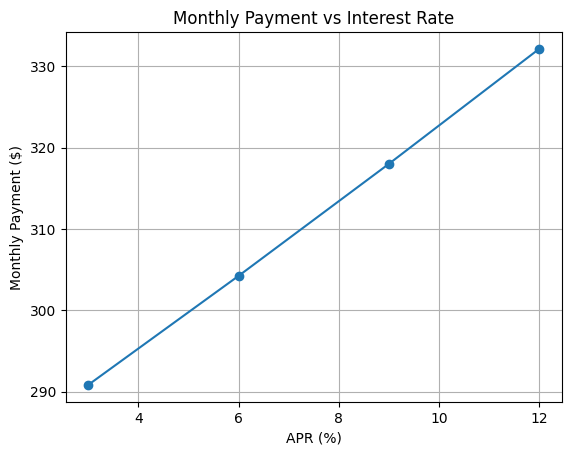

In [8]:
import matplotlib.pyplot as plt

plt.plot(df['APR'], df['Payment'], marker='o')
plt.title("Monthly Payment vs Interest Rate")
plt.xlabel("APR (%)")
plt.ylabel("Monthly Payment ($)")
plt.grid(True)
plt.show()

### Building a graph showing value of different sectors: 

Sector
Auto       1.80
Energy     1.35
Finance    0.90
Media      0.40
Retail     1.40
Tech       7.50
Name: Value, dtype: float64


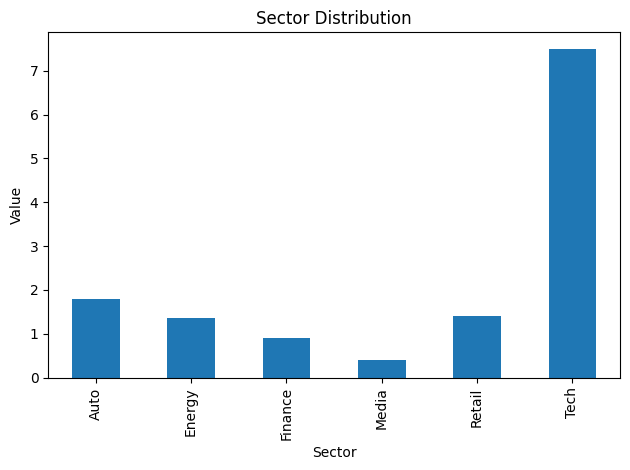

In [12]:
data = {
    'Ticker': ['AAPL','MSFT','JPM','TSLA','AMZN','WMT','COST','NFLX','XOM','CVX'],
    'Sector': ['Tech','Tech','Finance','Auto','Tech','Retail','Retail','Media','Energy','Energy'],
    'Value': [3.5,2,0.9,1.8,2,.8,.6,.4,.75,.6]
}
df = pd.DataFrame(data)
sector_value = df.groupby('Sector')['Value'].sum()
print(sector_value)

ax = sector_value.plot(kind='bar', title='Sector Distribution')
ax.set_xlabel('Sector'); ax.set_ylabel('Value')
plt.tight_layout(); plt.show()

### Building the same graph but including company count overlaid with value:

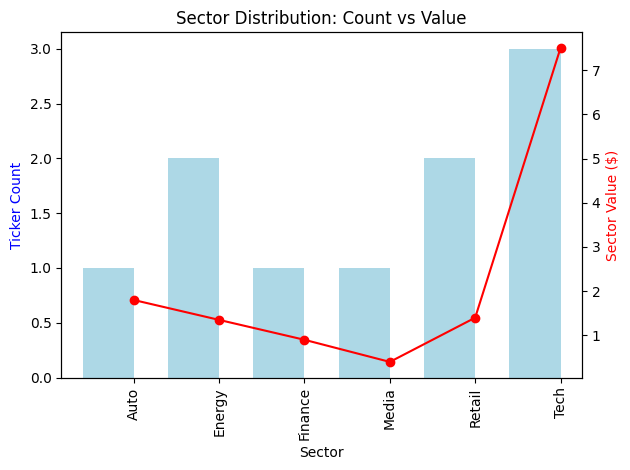

In [14]:
data = {
    'Ticker': ['AAPL','MSFT','JPM','TSLA','AMZN','WMT','COST','NFLX','XOM','CVX'],
    'Sector': ['Tech','Tech','Finance','Auto','Tech','Retail','Retail','Media','Energy','Energy'],
    'Value': [3.5,2,0.9,1.8,2,.8,.6,.4,.75,.6]
}
df = pd.DataFrame(data)
counts = df['Sector'].value_counts().sort_index()
values = df.groupby('Sector')['Value'].sum().sort_index()

import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

# Bar chart for counts
counts.plot(kind='bar', ax=ax1, color='lightblue', width=0.6, position=1)
ax1.set_ylabel("Ticker Count", color='blue')

# Line chart for values (secondary y-axis for scale)
ax2 = ax1.twinx()  
values.plot(kind='line', ax=ax2, color='red', marker='o')
ax2.set_ylabel("Sector Value ($)", color='red')

# Titles & layout
plt.title("Sector Distribution: Count vs Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
